# Representing image using high-intensity pixel coordinates 

In this notebook, we try to determine whether a low-dimension representation of the image constructed by thresholding the pixels and using their intensities as weights could be feasible as an alternative to MP.

**This does not look promising**

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from skimage.filters import threshold_otsu

from otimage import io, imagerep, imagereg, utils, viewers

## Load Zimmer data

In [3]:
# Path to file containing Zimmer data
in_fpath = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'

# Index of frame to use
t_frame = 5

with io.ZimmerReader(in_fpath) as reader:
    units = reader.units
    img = reader.get_frame(t_frame)

## Apply threshold to image

In [4]:
# Otsu thresholding
#threshold = threshold_otsu(img)

# Manually set threshold
threshold = 0.008

print(f'threshold: {threshold}')

img_th = np.copy(img)
img_th[img_th < threshold] = 0

threshold: 0.008


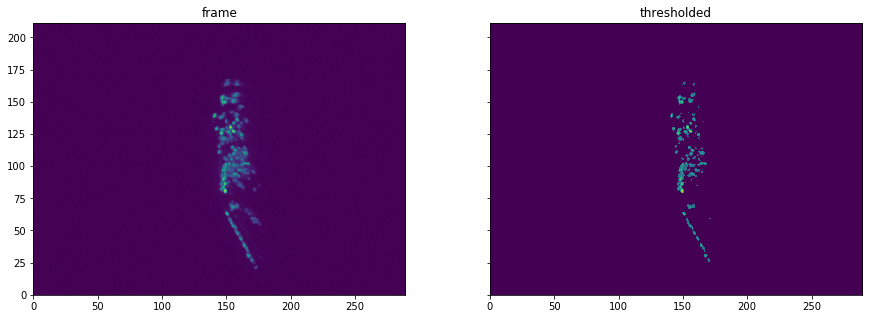

In [5]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

utils.plot_maxproj_units(img, units, ax=ax_1)
ax_1.set_title('frame')

utils.plot_maxproj_units(img_th, units, ax=ax_2)
ax_2.set_title('thresholded');

## Inspect 

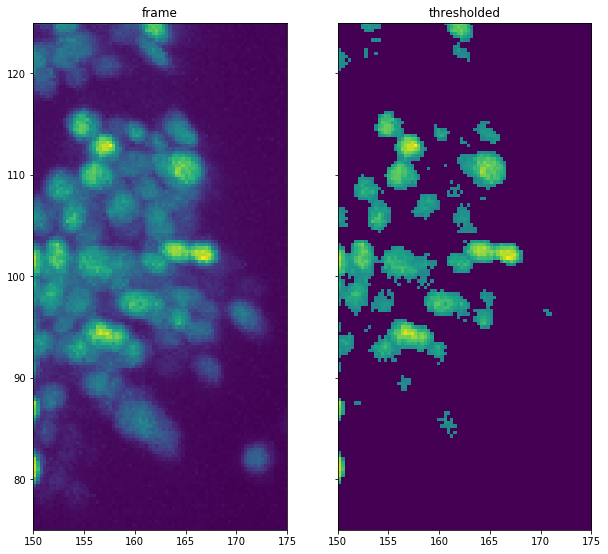

In [6]:
region = (150, 175, 75, 125)

fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)

utils.plot_maxproj_zoom(img, units, region, ax=ax_1)
ax_1.set_title('frame')

utils.plot_maxproj_zoom(img_th, units, region, ax=ax_2)
ax_2.set_title('thresholded');

## Run GW on thresholded image

In [7]:
p_idx = (img_th != 0)

pts_vx = np.stack(np.nonzero(p_idx), axis=1)
wts = img_th[p_idx]

In [8]:
pts_1 = pts_vx
pts_2 = pts_vx + np.array([[10, 20, 0]])

gw_mtx, debug = imagereg._compute_gw(pts_1, pts_2, wts, wts)

/home/mn2822/anaconda3/envs/worm-ot/lib/python3.7/site-packages/ot/lp/__init__.py:113: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
